  <b>Student</b>: Samuel Littlefield   
  <b>Course</b>: BIA 6303   
  <b>Assignment</b>: Homework Assignment #1 - Notebook #1  
  <b>Due Date</b>: 11/13/2022 @ 11:59PM

## Warm up on Pre-processing using Pandas, Matplotlib (and a little Scikit Learn).

<font color='#2B3856'><b>1.</b> Read in AUTO.csv file into a data frame and call it Auto.</font>

To begin this assignement we'll invoke the pandas library, use it to import the AUTO.csv from github, and then place this file into the data frame "Auto".

In [1]:
# invoke the pandas library and alias as 'pd'
import pandas as pd

# set the url to the AUTO.csv file on github into a variable
url = "https://raw.githubusercontent.com/samuel-littlefield/BIA-6303_Assignments/main/AUTO.csv"

# use pandas to read in the AUTO.csv file and name the data frame 'Auto'
Auto = pd.read_csv(url, index_col=None, header=0, encoding='latin-1')

# use the head function to display the first five rows of data
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


Since the output displayed without any noticable errors, this indicates the data was read in correctly.

<font color='#2B3856'><b>2.</b> Replace any missing values with the median value of the variable (feature).</font>

First, we'll need to determine if there are any missing values and if so, locate where that data is missing. We'll start this process by inspecting the data types of each column and what data is contained in each of those columns. Having the correct data types ensures that our functions are preforming as expected, as certain data types will behave differently than others.

In [2]:
# get info on the Auto data frame
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      106 non-null    object 
 1   Drive Type                106 non-null    object 
 2   Mileage (mpg)             106 non-null    float64
 3   Fuel Type                 106 non-null    object 
 4   Capacity (gal)            106 non-null    float64
 5   Length (inches)           106 non-null    float64
 6   Wheel Base (inches)       106 non-null    float64
 7   Width (inches)            106 non-null    float64
 8   Turning Circle (feet)     106 non-null    float64
 9   Weight (lbs)              106 non-null    object 
 10  Door Top (inches)         106 non-null    float64
 11  Luggage (cu. ft.)         104 non-null    float64
 12  Front Shoulder (inches)   106 non-null    float64
 13  Front Leg Room (inches)   106 non-null    float64
 14  Front Head

From the output, there are two issues which can be seen that may point to missing values.

- The RangeIndex states there are 190 entries, yet the "Non-Null Count" for each column is only 106. This suggests there may be null rows which were read in with our data frame.
- In the column "Non-Null Count", all columns have a value of 106 with the exception of Luggage (cu. ft.) which has 104.

Let's start by investigating the disparity between 190 entries and 106 values. We'll take a look at the tail of our data frame first to see if there were blank rows at the end of our csv.

<b>NOTE</b>: We can also observe that Weight (lbs) is the datatype 'object', this will need to be corrected in a future step.

In [3]:
# use the tail function to display the last five rows of data
Auto.tail()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The output confirms the suspicion of bringing in blank rows from our csv. Since we know the task is to "<em>Replace any missing values with the median value of the variable (feature)</em>", it's important to note that we can't do this for categorical variables such as the name of each Auto. Because of this, we'll need to remove blank rows without also risking the lost of the two rows were a value for Luggage (cu. ft.) is missing, we'll create a subset of our Auto data frame where the feature Name is not blank.

In [4]:
# create subset of the Auto data frame where Name is not na
Auto_Subset = Auto[Auto['Name'].notna()]

Next we'll verify that Auto_Subset no longer contains blank rows.

In [5]:
# count non blank values in each variable
Auto_Subset[Auto_Subset['Name'].isna() == False].count()

Name                        106
Drive Type                  106
Mileage (mpg)               106
Fuel Type                   106
Capacity (gal)              106
Length (inches)             106
Wheel Base (inches)         106
Width (inches)              106
Turning Circle (feet)       106
Weight (lbs)                106
Door Top (inches)           106
Luggage (cu. ft.)           104
Front Shoulder (inches)     106
Front Leg Room (inches)     106
Front Head Room (inches)    106
Rear Shoulder (inches)      106
Rear Leg Room (inches)      106
Rear Head Room (inches)     106
dtype: int64

From this output we call observe that each variable has 106 non-na values with the exception of Luggage (cu. ft.) which we previously determined has two additional na values. This confirms that our fix removed all blank rows while preserving these two rows.

We'll now replace the Auto data frame with our subset.

In [6]:
# replace the Auto data frame
Auto = Auto_Subset

Next, let's locate where the na values are in the Luggage (cu. ft.) variable.

In [7]:
# filter Auto data frame to records where Luggage is NaN
Auto[Auto['Luggage (cu. ft.)'].isna()]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,"5,210",70.5,NaN,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,"3,870",60.0,NaN,54.0,42.5,5.0,18.0,22.5,2.0


It appears Luggage (cu. ft.) is missing in rows 87 and 88. Let's now check the median of Luggage (cu. ft.).

In [8]:
# median value of Luggage
Auto['Luggage (cu. ft.)'].median()

16.0

While we shouldn't have concerns that the NaN values are influencing the median, we can varify this out of causion.

In [9]:
# median value of Luggage excluding NA values
Auto['Luggage (cu. ft.)'][Auto['Luggage (cu. ft.)'].notna()].median()

16.0

From the output we can observe that the median is 16.0 cu. ft. and is not influenced by that NaN values. We can now replace these missing values with the median.

In [10]:
# replace missing values with median
Auto['Luggage (cu. ft.)'][Auto['Luggage (cu. ft.)'].isna()] = Auto['Luggage (cu. ft.)'].median()

Since we know the missing values were in rows 87 and 88, let's take another look at these rows to confirm that the value of Luggage (cu. ft.) is now 16.0 for these two rows.

In [11]:
# display records 87 and 89
Auto.iloc[87:89]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,"5,210",70.5,16.0,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,"3,870",60.0,16.0,54.0,42.5,5.0,18.0,22.5,2.0


In viewing the output of rows 87 and 88, we can confirm that the value for Luggage (cu. ft.) is now 16.0.

<font color='#2B3856'><b>3.</b> Explore the general characteristics of the data, by computing the means and standard deviations of the numerical attributes, as well as the distributions of “drive type” and “fuel type” (both are categorical). You can do this for each individual variable separately or a function to compute for the entire data frame (or both).</font>

Before we begin this step, if we recall back to the note previously mentioned regarding the Weight (lbs) variable it's important that we recove that issue before moving forwards. If we look at the previous output, we can see that the value of Weight (lbs) for row 87 is "5,210". The presense of thousands seperator is likely what caused pandas to read this varible as a non-numeric datatype. We will remove the thousands seperator and convert this variable to a numeric datatype.

In [12]:
# remove the thousands seperator
Auto["Weight (lbs)"] = Auto["Weight (lbs)"].str.replace(',','')

# convert variable to numeric datatype
Auto["Weight (lbs)"] = pd.to_numeric(Auto["Weight (lbs)"])

# display head and tail to inspect update
Auto["Weight (lbs)"]

0      2635
1      3460
2      3350
3      3640
4      3880
       ... 
101    3230
102    3055
103    5290
104    3935
105    5850
Name: Weight (lbs), Length: 106, dtype: int64

In the previous update, we can see from the head and tail of the dataset the thousands seperator has been removed and that the datatype is now numeric (notated by dytype: int64).

We'll now look at the means and standard diviations of all numeric variables.

In [13]:
# display descriptive statistics, rounded to 4 decimal places to clean-up displayed output
Auto.describe().round(4)

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000,106.0000
mean,21.2925,17.8830,187.5943,107.6321,70.9151,39.8491,3502.3113,53.8915,25.0566,56.4717,41.2547,4.2877,54.7453,28.3632,3.0236
std,3.7695,3.4257,12.4936,7.0147,3.2370,2.7973,633.4539,5.7475,18.2355,3.0416,1.0218,1.2798,7.1104,2.1969,1.3704
min,13.0000,12.1000,152.0000,93.0000,66.0000,34.0000,2420.0000,46.5000,10.0000,51.5000,39.0000,1.5000,6.5000,22.5000,0.0000
25%,19.0000,15.8250,178.0000,103.0000,68.0000,38.0000,3106.2500,50.0000,14.0000,54.0000,40.5000,3.5000,52.6250,27.0000,2.0000
50%,21.0000,17.4000,188.0000,107.0000,70.0000,40.0000,3395.0000,51.0000,16.0000,56.0000,41.0000,4.5000,56.0000,28.5000,3.0000
75%,23.0000,19.0000,195.0000,112.0000,73.0000,41.0000,3890.0000,60.0000,30.7500,58.5000,42.0000,5.0000,57.0000,30.0000,4.0000
max,31.0000,30.0000,226.0000,139.0000,80.0000,49.0000,5850.0000,70.5000,76.0000,63.5000,44.0000,8.0000,64.5000,34.0000,6.0000


The output above allows us to see the mean and standard diviation of all numeric variables. We can also see some additional statistics which could be of use. To further explain these, we'll review descriptive statistics for the variable "Milage (mpg)":

- count: There are 106 recorded values for Milage (mpg)
- min: The minimum value recorded is 13 mpg
- 25%: The first quartile, or 25% of values, falls below 19 mpg
- 50%: The second quartile, or 50% of values, falls below 21 mpg
- 75%: The thrid quartile, or 75% of values, falls below 23 mpg
- max: The maximum value recorded is 31 mpg

Next we'll look at the distribution of the variable Drive Type. First, we'll look at how many categories are in this variable.

In [14]:
# check categories in Drive Type
set(Auto['Drive Type'])

{'Front', 'Rear'}

There are two categories of drive type, we'll use a bar graph to visualize the distribution using Seaborn.

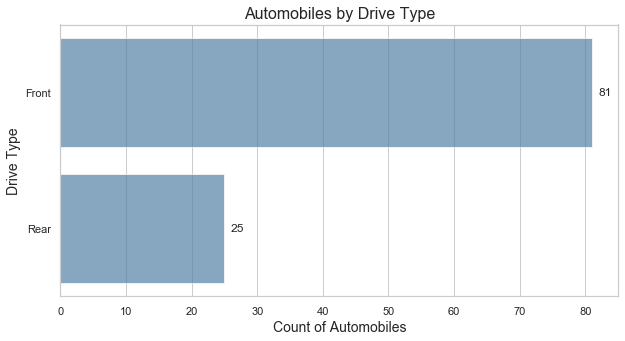

In [15]:
# invoke libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set style and plot size.
sns.set(rc = {'figure.figsize':(10, 5)}, style="whitegrid") # set style and plot size

# feed data into plot and pick color, opacity, and orientation of bars
ax = sns.countplot(y ='Drive Type', data = Auto,
                   order=Auto['Drive Type'].value_counts().index,
                   color='steelblue', alpha  = .7, orient='h')

# set title for plot
ax.set_title( "Automobiles by Drive Type" , size = 16 )

# set label for x-axis
ax.set_xlabel( "Count of Automobiles" , size = 14 )
  
# set label for y-axis
ax.set_ylabel( "Drive Type" , size = 14 )

# label each bar in barplot
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of automobiles)
 # adding text to each bar
 ax.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
         y = p.get_y()+(height/2), # y-coordinate position of data label, padded to be in the middle of the bar
         s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
         va = 'center') # sets vertical alignment (va) to center

In the chart above we can observe that our data set contains 81 automobiles with a drive type of front wheel drive and 25 with a drive type of rear wheel drive.

Next we'll look at the distribution of fuel type and following the same steps.

In [16]:
# check categories in Fuel Type
set(Auto['Fuel Type'])

{'Premium', 'Regular', 'Regular '}

The output shows that we have two categories for "Regular" and the second appears to have a additional space at the end. We'll need to correct this in order to ensure that we have consistent categorization.

Well do this by replacing all values of "Regular " with "Regular"

In [17]:
# replace 'Regular ' values with 'Regular'
Auto.loc[ Auto['Fuel Type'] == 'Regular ', 'Fuel Type'] = 'Regular'

Before moving forward with visualizing the distribution, we'll check the categories again to insure our change took place correctly.

In [18]:
# check categories in Fuel Type
set(Auto['Fuel Type'])

{'Premium', 'Regular'}

Excellent! Our correction was successful. We'll now visualize the distribution.

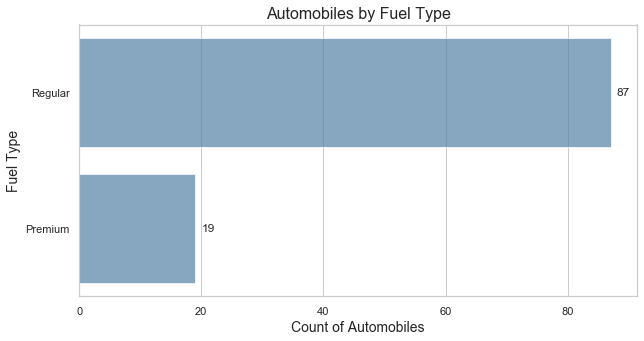

In [19]:
# feed data into plot and pick color, opacity, and orientation of bars
ax = sns.countplot(y ='Fuel Type', data = Auto,
                   order=Auto['Fuel Type'].value_counts().index,
                   color='steelblue', alpha  = .7, orient='h')

# set title for plot
ax.set_title( "Automobiles by Fuel Type" , size = 16 )

# set label for x-axis
ax.set_xlabel( "Count of Automobiles" , size = 14 )
  
# set label for y-axis
ax.set_ylabel( "Fuel Type" , size = 14 )

# label each bar in barplot
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of automobiles)
 # adding text to each bar
 ax.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
         y = p.get_y()+(height/2), # y-coordinate position of data label, padded to be in the middle of the bar
         s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
         va = 'center') # sets vertical alignment (va) to center

In the chart above we can observe that our data set contains 87 automobiles with a fuel type of regular and 19 with a fuel type of premium.

<font color='#2B3856'><b>4.</b> Use z-score normalization to standardize the values of the Weight attribute. Show the results side-by-side with the original Weight attribute. [Do not change the original Weight attribute in the table.] Alternatively you may choose to use a [0,1] Min-Max Normalization.You can create this by a manual calculation or use StandardScaler() in sklearn.preprocessing (</font>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<font color='DarkBlue'>).</font>

We'll elect to apply Min-Max Normalization, however, code will be included in comments for z-score normalization.

In [20]:
# apply min-max normalization to weight feature
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
weight_scaled = mms.fit_transform(Auto[['Weight (lbs)']])
weight_scaled 
Auto['Weight Scaled'] = weight_scaled
Auto[['Weight (lbs)', 'Weight Scaled']].head()

# code for applying z-scale normalization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#weight_scaled = scaler.fit_transform(Auto[['Weight (lbs)']])
#weight_scaled
#Auto['Weight Scaled'] = weight_scaled
#Auto[['Weight (lbs)', 'Weight Scaled']].head()

,Weight (lbs),Weight Scaled
0,2635,0.062682
1,3460,0.303207
2,3350,0.271137
3,3640,0.355685
4,3880,0.425656


<font color='#2B3856'><b>5.</b> Convert the categorical variables into dummies. Note that this requires converting each categorical attribute into multiple attributes (dummies) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record.</font>

To complete this task, we have two categorical variables to convert. Those are 'Drive Type' and 'Fuel Type'. We'll start with 'Drive Type'.

In [21]:
# creating dummy variables of Drive Type
Drive_dummy=pd.DataFrame(pd.get_dummies(Auto['Drive Type']))
Drive_dummy.head()

,Front,Rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


And now we'll create the dummy variable of 'Fuel Type'.

In [22]:
# creating dummy variables of Fuel Type
Fuel_dummy=pd.DataFrame(pd.get_dummies(Auto['Fuel Type']))
Fuel_dummy.head()

,Premium,Regular
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


Because we'll need to merge our dummies with the original data frame, we can also create dummies for both features into a single object.

In [23]:
# create dummy variables of fuel and drive types
dummy=pd.get_dummies(Auto[['Fuel Type', 'Drive Type']])
dummy.columns

Index(['Fuel Type_Premium', 'Fuel Type_Regular', 'Drive Type_Front',
       'Drive Type_Rear'],
      dtype='object')

Before merging, we'll convert these dummy variables into a data frame and view the head of that new data frame.

In [24]:
# save dummies as data frame
dummy=pd.DataFrame(dummy)
dummy.head()

,Fuel Type_Premium,Fuel Type_Regular,Drive Type_Front,Drive Type_Rear
0,0,1,1,0
1,1,0,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


Next, we'll merge both dataframes.

In [25]:
Auto = pd.merge(Auto, dummy, left_index=True, right_index=True)
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),...,Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Weight Scaled,Fuel Type_Premium,Fuel Type_Regular,Drive Type_Front,Drive Type_Rear
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,2635,...,41.5,2.0,46.5,25.0,0.5,0.062682,0,1,1,0
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,3460,...,40.5,2.5,55.0,27.0,2.0,0.303207,1,0,1,0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,3350,...,44.0,5.0,57.0,30.0,2.0,0.271137,0,1,1,0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,3640,...,40.5,5.0,58.0,27.5,4.5,0.355685,0,1,1,0
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,3880,...,42.5,6.0,58.5,31.5,3.0,0.425656,0,1,1,0


<font color='#2B3856'><b>6.</b> Perform basic correlation analysis (a correlation matrix) among the attributes. Perform both numeric and visual correlation outputs.</font>

First, we'll create a correlation matrix. For our variables, we'll exclude our categorical variables (our dummy variables) along with the scaled version of the Weight feature. Displaying the correlation matrix will provide us with a numeric output.

In [26]:
# create correlation matrix
corr_matrix = Auto.iloc[:,2:18].corr()
corr_matrix

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
Mileage (mpg),1.000000,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.875434,-0.771332,-0.619985,-0.607314,0.053420,-0.236747,-0.269556,-0.274588,-0.654005
Capacity (gal),-0.787515,1.000000,0.505427,0.660131,0.678437,0.526678,0.888074,0.752458,0.716461,0.722434,-0.014806,0.274185,0.213711,0.371609,0.647434
Length (inches),-0.387151,0.505427,1.000000,0.869492,0.832541,0.684696,0.550863,0.117489,0.240717,0.787516,0.268169,0.203634,0.203753,0.530583,0.200537
Wheel Base (inches),-0.512751,0.660131,0.869492,1.000000,0.791321,0.641709,0.678488,0.411330,0.448967,0.790025,0.232445,0.294628,0.116297,0.407676,0.361039
Width (inches),-0.578650,0.678437,0.832541,0.791321,1.000000,0.642269,0.743765,0.403390,0.450949,0.909002,0.091544,0.294469,0.400622,0.501899,0.416956
Turning Circle (feet),-0.571132,0.526678,0.684696,0.641709,0.642269,1.000000,0.625479,0.413344,0.384132,0.624658,0.116876,0.251681,0.138586,0.340659,0.315220
Weight (lbs),-0.875434,0.888074,0.550863,0.678488,0.743765,0.625479,1.000000,0.777217,0.656608,0.762697,0.022551,0.242911,0.319833,0.388947,0.624352
Door Top (inches),-0.771332,0.752458,0.117489,0.411330,0.403390,0.413344,0.777217,1.000000,0.803932,0.498575,-0.240942,0.388512,0.175732,0.065755,0.742755
Luggage (cu. ft.),-0.619985,0.716461,0.240717,0.448967,0.450949,0.384132,0.656608,0.803932,1.000000,0.603918,-0.222359,0.358312,0.201275,0.314236,0.791403
Front Shoulder (inches),-0.607314,0.722434,0.787516,0.790025,0.909002,0.624658,0.762697,0.498575,0.603918,1.000000,0.063630,0.329347,0.441564,0.550277,0.570227


The correlation in the output above is quite large, as we have a large count of features. As an example of how to read this output, let's look at the cell where Capcity (gal) on the y-axis intersects with Mileage (mpg) on the x-axis. Here there is a value of -0.787515, this indicates that there is a strong negative relationship between capacity and mileage. This can otherwise be stated as when mileage increases, fuel capacity descreases. This may likely be do to automobiles needing less fuel capacity as a result of higher fuel efficency.

This example helps displays the value in a correlation matrix, however, it's difficult to read. We'll produce a visualization of this matrix to make it more readable.

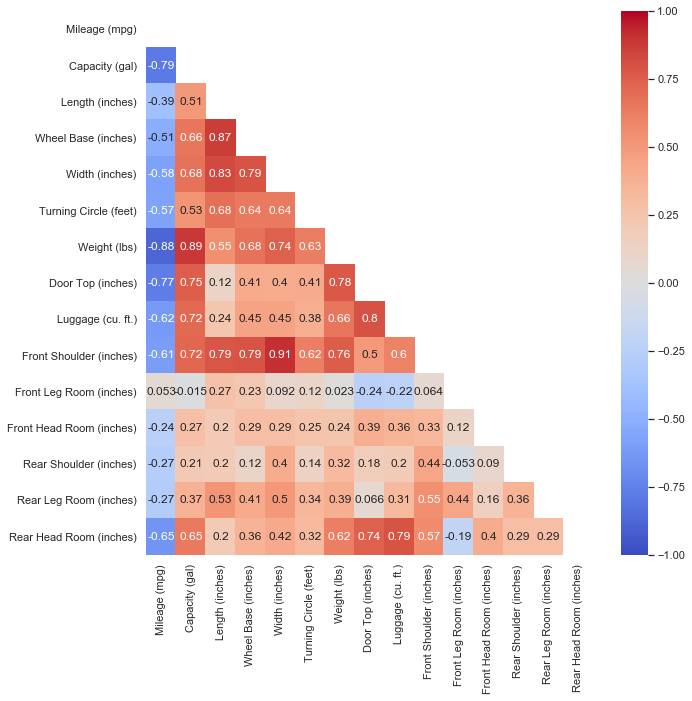

In [27]:
#code chunk is attributed as follows:
#Shaw, Chris (2019). How to customize seaborn correlation heat map. Medium. 
#Retrieved from https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b.

import numpy as np

plt.figure(figsize=(10,10)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

If we look at the intersection of Capacity (gal) and Mileage (mpg) in the visual above, we can see the value of -0.79 in a blue square. The visual simplifies the matrix and adds color to help distinguish the stronger relationships. For example, we can quickly see that the strongest positive relationship is between Front Shoulder (inches) and Width (inches) and the strongest negative relationship is between Weight (lbs) and Mileage (mpg).

<font color='#2B3856'><b>7.</b> Using the new converted dataset, perform a Principal Component Analysis (PCA). How much variation is captured in 3 Principal Components? Here is the documentation for PCA:</font> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

First, we'll make sure that we only have columns in numeric form. We'll exclude the feature Name as this would effectively be a unique identifier for each automobile. This would throw off our machine learning algorithms as they would have an absolute way to identify each record in the train phase. We'll also drop the weight scaled feature as this is redundent.

In [28]:
# remove weight scaled feature
Auto = Auto.drop(['Weight Scaled'], axis=1)

# save only numeric type features
Auto_PCA = Auto.select_dtypes(include='number')

# display columns for verification
Auto_PCA.columns

Index(['Mileage (mpg)', 'Capacity (gal)', 'Length (inches)',
       'Wheel Base (inches)', 'Width (inches)', 'Turning Circle (feet)',
       'Weight (lbs)', 'Door Top (inches)', 'Luggage (cu. ft.)',
       'Front Shoulder (inches)', 'Front Leg Room (inches)',
       'Front Head Room (inches)', 'Rear Shoulder (inches)',
       'Rear Leg Room (inches)', 'Rear Head Room (inches)',
       'Fuel Type_Premium', 'Fuel Type_Regular', 'Drive Type_Front',
       'Drive Type_Rear'],
      dtype='object')

We can now move forward with Principle Component Analysis. We'll scall the features, fit for PCA, and then display the explained variance of the top three components. We'll then sum these three together to get the total percentage of explained variance in these three components.

In [29]:
# invoke PCA and StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale the data
sc = StandardScaler()
Auto_PCA_std = sc.fit_transform(Auto_PCA)

# set number of components to three
pca = PCA(n_components=3)
pca.fit(Auto_PCA_std)

# format output 
print("The explained variance for the top three components: " + str(pca.explained_variance_ratio_))
print("Together, these three components account for the following percent of total variance: {:,.2%}".format(sum(pca.explained_variance_ratio_)))

The explained variance for the top three components: [0.41783    0.13280695 0.12518709]
Together, these three components account for the following percent of total variance: 67.58%


We can varify these results by creating a covariance matrix and identifying the eigen values.

In [30]:
# invoke PCA and numpy
from sklearn.preprocessing import StandardScaler
import numpy as np

# scale the data
sc = StandardScaler()
Auto_PCA_std = sc.fit_transform(Auto_PCA)

# produce the covariance matrix and eigen values
cov_mat = np.cov(Auto_PCA_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print output
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 8.01437739e+00  2.54736380e+00  2.40120754e+00  1.61324729e+00
  1.08906373e+00  9.46265542e-01  7.31895483e-01  5.01583831e-01
  3.47538047e-01  2.50365287e-01  2.24938830e-01  1.48762346e-01
  1.30911793e-01  9.71279135e-02  6.23116963e-02  4.59933008e-02
  2.79985535e-02 -3.87562282e-17 -9.69227503e-17]


Next, we'll produce a visual of the principle components.

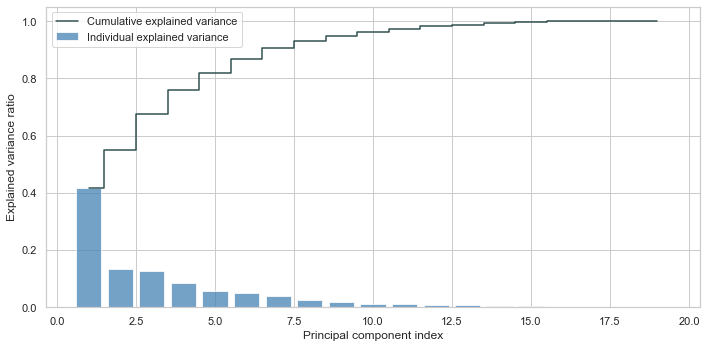

In [31]:
# invoke matplotlib
import matplotlib.pyplot as plt

# prepare parameters for visualization
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot individual explained variance (bars)
plt.bar(range(1,20), var_exp, color='steelblue',  
        alpha=0.75, align='center', label='Individual explained variance')

# plot cumulative explained variance (line)
plt.step(range(1,20), cum_var_exp, where='mid', label = 'Cumulative explained variance', color='darkslategray')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Recalling back to our top three principle components which came in at 41.78%, 13.28%, and 12.52%. We can see in our scree plot that the first three bars align with those values. This scree plot also helps us to see the diminising returns of the additional components.

<font color='#2B3856'><b>8.</b> Using Matplotlib library, create a scatter plot of the (non-normalized) Weight attribute relative to MPG. Be sure that your plot contains appropriate labels for the axes. (You can alternatively explore the seaborn package if you want:https://seaborn.pydata.org/<font color='#2B3856'>).</font>

For this task, we'll simply produce our scatterplot using seaborn.

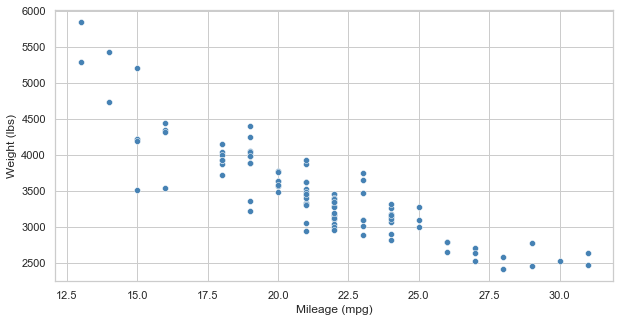

In [32]:
sns.scatterplot(data=Auto, y='Weight (lbs)', x='Mileage (mpg)', color='steelblue')
plt.show()

In observing the scatterplot, it appears that as weight decreases, mileage increases. This is consistent with the correlation we saw in our matrix previously.

<font color='#2B3856'><b>9.</b> Using the hist function in Matplotlib (or Seaborn or both), create histograms for (non-normalized) Luggage (using 6 bins) and MPG (using 7 bins).</font>

We'll use seaborn to create the histogram of Luggage (cu. ft.). As a note, we saved the normalized data as another variable during the steps of PCA. Therefore, the Auto data frame is still non-normalized and meets the criteria of this task.

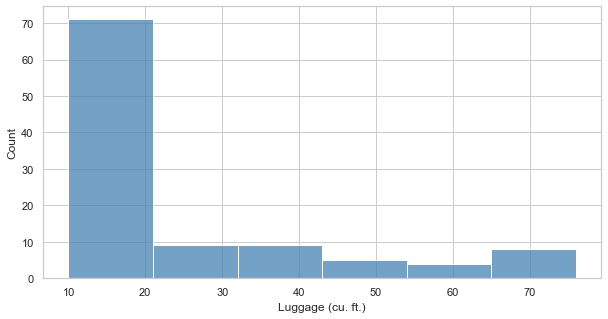

In [33]:
import seaborn as sns
sns.histplot(data=Auto, x="Luggage (cu. ft.)", bins=6, color='steelblue')
plt.show()

From this histogram we can see our data is skewed to the right. Next we'll produce the histogram of Mileage (mpg).

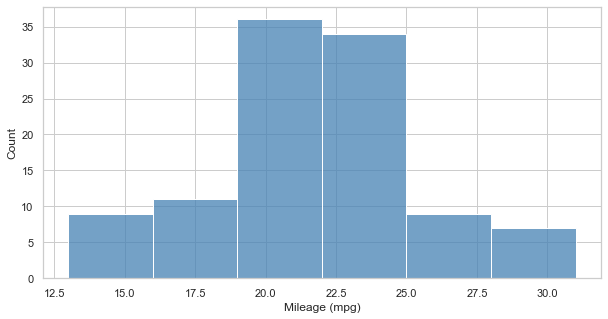

In [34]:
sns.histplot(data=Auto, x='Mileage (mpg)', bins=6, color='steelblue')
plt.show()

This histogram is closer to normal distribution than the previous.

<font color='#2B3856'><b>10.</b> Perform a cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables. This requires the aggregation of the occurrences of each Fuel Type separately for each Drive Type. You can use whatever appropriate data structure you which to store the results, but you can display it as as a 2 x 2 table with entries representing the counts. Then, use Matplotlib to create a bar chart graph to visualize of the relationships between these sets of variables (comparing Regular and Premium customer across the two drive types). Your chart should contain appropriate labels for axes.</font>

For this taks, we'll begin with producing the crosstab table and printing it as output.

In [35]:
#crosstab
fuel_drive_cross=pd.crosstab(Auto['Drive Type'], Auto['Fuel Type'], 
                             colnames=['Drive Type'],rownames=['Fuel Type'])
print(fuel_drive_cross)

Drive Type  Premium  Regular
Fuel Type                   
Front            11       70
Rear              8       17


Now we'll produce a stacked barchart to visualize the crosstab.

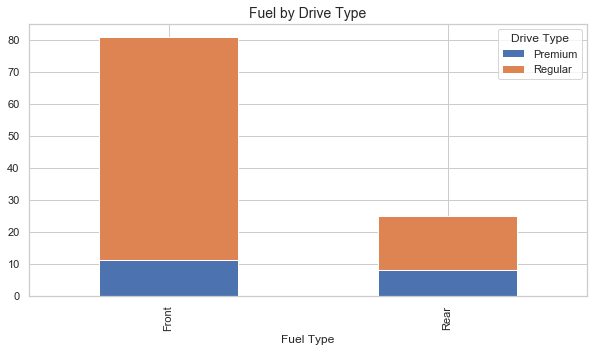

In [36]:
#bar chart of Genre by Gender
fuel_drive_cross.plot(kind='bar', stacked=True)
plt.title('Fuel by Drive Type', size=14)
plt.show()

We can observe from this chart that most automobiles are front wheel drive and use regular few. The rarest combination appears to be a rear wheel drive using premium fuel.

<font color='#2B3856'><b>11.</b> Create a new data frame where fuel is “regular” AND MPG is over 21. Call it Auto_sub.</font>

We'll produce a subset of Auto accounting for both filters, save it as "Auto_sub" and display the head of the subset data frame to confirm our steps were correct.

In [37]:
Auto_sub = Auto.loc[(Auto['Fuel Type']=='Regular') & (Auto['Mileage (mpg)']> 21)]
Auto_sub.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),...,Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Fuel Type_Premium,Fuel Type_Regular,Drive Type_Front,Drive Type_Rear
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,2635,...,51.5,41.5,2.0,46.5,25.0,0.5,0,1,1,0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,3350,...,58.0,44.0,5.0,57.0,30.0,2.0,0,1,1,0
6,Chevrolet Cavalier,Front,26.0,Regular,15.2,181.0,104.0,68.0,38.0,2795,...,54.5,41.5,4.5,53.5,28.0,2.0,0,1,1,0
8,Chevrolet Lumina,Front,22.0,Regular,16.6,201.0,108.0,73.0,44.0,3350,...,58.5,42.5,4.5,57.0,30.0,2.0,0,1,1,0
9,Chevrolet Malibu,Front,24.0,Regular,15.2,190.0,107.0,69.0,40.0,3075,...,55.0,43.0,4.5,54.0,30.5,2.0,0,1,1,0
